# What should you prefer a job in Western World or Easter World?

### Business Understanding

In this dataset I was interested to find out following answers:
* Which side have better job opportunities is it eastern side or western side? 
* What is the average salaries in eastern world and western world?
* In which side job satisfaction is higher?
* As a computer science graduate which side of world would be better for me? Should I go to western world or should I pursue my job in eastern world?
* What type of formal education would help me to find jobs easily?

In [3]:
#import necessary libraries to handle the data
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [4]:
#Read the data and check the overview of data
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#info about datset how many rows or column we are dealing with
print("No of row",df.shape[0])
print("No of columns", df.shape[1])

No of row 51392
No of columns 154


In [6]:
#What kind of developer are you
def displayBarChart(df,col,title,y):
    '''
    A function used to plot a bar chart
    4 arguments first one is dataset 
    second one is column name
    third is title of our plot
    four is title of y axis
    '''
    status_values = df[col].value_counts()
    status_values.plot(kind = 'bar')
    #plt.xlabel(x, fontsize = 16);
    plt.ylabel(y, fontsize = 16);
    plt.title(title, fontsize = 16)

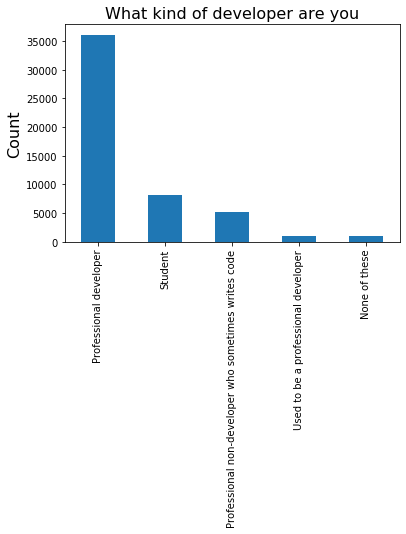

In [8]:
# A simple bar chart to represent what kind of developer are you
displayBarChart(df,'Professional',"What kind of developer are you","Count")

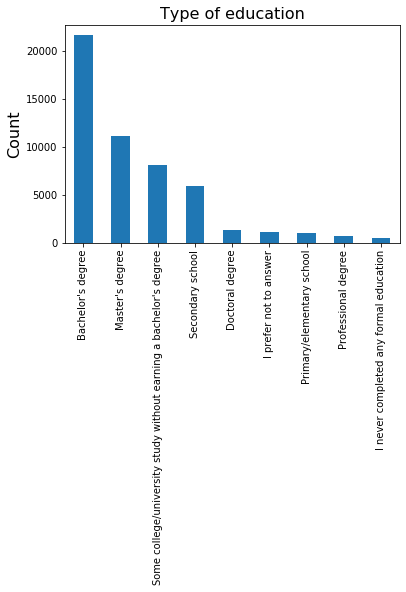

In [9]:
#A barchart to represent what is your formal education
displayBarChart(df,'FormalEducation',"Type of education","Count")

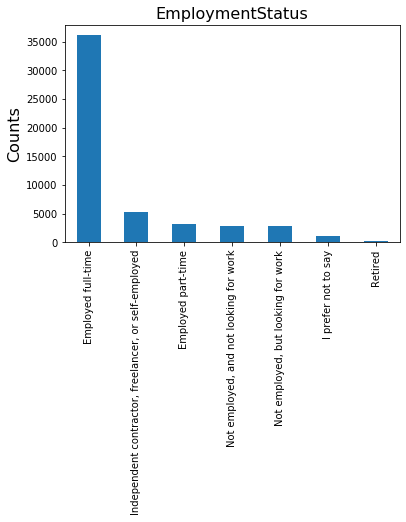

In [10]:
#Provide a pandas series of the counts for each Employment status
displayBarChart(df, "EmploymentStatus","EmploymentStatus","Counts")

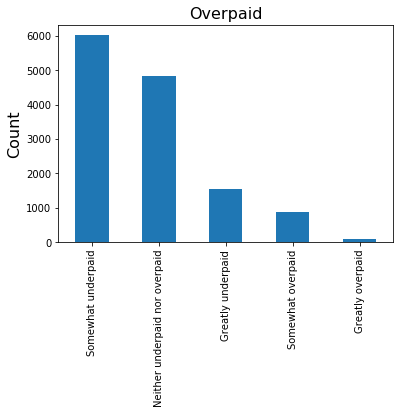

In [11]:
#Provide a pandas series of the counts for each Overpaid status
displayBarChart(df, "Overpaid","Overpaid", "Count")

## Data preparation
* For categorical variables "Country", we seperate them into three sectors: western, eastern and other. The following code define the lists of related countries and create a new column to identify whether that person lives in the west or in the east.

In [12]:

def handling_country(df):
    '''
    
    Return a dataframe with country seperate into west and east
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df: a dataframe with a new column west_or_east
    
    '''
    # For Categorical variables "Country", we seperate them into 
    # three sessions: western, eastern and other
    # The following lists define the countries to western and eastern
    western = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

    eastern = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam']
    
    #Add a new catagory seperating to western and eastern
    df['region'] = df['Country'].apply(lambda x: 'western' if x in western else ('eastern' if x in eastern else 'other'))
    
    return df

#### Here we select some useful columns for our analysis.

* Country: Country they are living
* YearsCodedJob: Years they are coding
* EmploymentStatus: Their employment status
* Salary: Their Salary
* JobSatisfaction & CareerSatisfaction: Are their satisfy their job and career
* Overpaid: How they think about their salary

We especially focus on employed full-time professional developer.

In [13]:
df = handling_country(df)
df = df[['Country', 'YearsCodedJob', 'EmploymentStatus', 'FormalEducation','CareerSatisfaction', 'JobSatisfaction', 'JobSeekingStatus', 'HoursPerWeek', 'Salary', 'region', 'Overpaid']]

In [14]:
df.head()

,Country,YearsCodedJob,EmploymentStatus,FormalEducation,CareerSatisfaction,JobSatisfaction,JobSeekingStatus,HoursPerWeek,Salary,region,Overpaid
0,United States,NaN,"Not employed, and not looking for work",Secondary school,NaN,NaN,"I'm not actively looking, but I am open to new...",0.0,NaN,western,NaN
1,United Kingdom,NaN,Employed part-time,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,western,NaN
2,United Kingdom,20 or more years,Employed full-time,Bachelor's degree,8.0,9.0,NaN,NaN,113750.0,western,Neither underpaid nor overpaid
3,United States,9 to 10 years,Employed full-time,Doctoral degree,6.0,3.0,I am actively looking for a job,5.0,NaN,western,NaN
4,Switzerland,10 to 11 years,Employed full-time,Master's degree,6.0,8.0,NaN,NaN,NaN,western,NaN


In [15]:
comparison = df.groupby(['region','YearsCodedJob']).mean()
comparison

CareerSatisfaction  JobSatisfaction  HoursPerWeek  \
region  YearsCodedJob                                                         
eastern 1 to 2 years                6.375880         5.823260      6.368015   
        10 to 11 years              7.208333         6.552083      3.886364   
        11 to 12 years              7.016949         6.842105      7.960000   
        12 to 13 years              7.203390         6.644068      6.142857   
        13 to 14 years              6.761905         6.714286      9.300000   
...                                      ...              ...           ...   
western 6 to 7 years                7.518734         7.167791      2.753219   
        7 to 8 years                7.460411         7.159046      2.675127   
        8 to 9 years                7.502222         7.122007      2.690341   
        9 to 10 years               7.390734         7.041864      2.540918   
        Less than a year            7.448298         7.398639      3.480469   

                                Salary  
region  YearsCodedJob                   
eastern 1 to 2 years       8100.223153  
        10 to 11 years    29916.833945  
        11 to 12 years    37224.925469  
        12 to 13 years    53430.910772  
        13 to 14 years    50413.640521  
...                                ...  
western 6 to 7 years      68874.694671  
        7 to 8 years      70501.023899  
        8 to 9 years      76088.092271  
        9 to 10 years     74321.438914  
        Less than a year  45168.936869  

[63 rows x 4 columns]


YearsCodedJob we transfer it to calculatable integer value because we want to find out the mean of how long they have been coded. The following code shows the mapping. We change like '1 to 2 years' to 1 we change it string to int

In [16]:

def handling_yearscodedjob(df):
    """
    
    Convert the working year to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with YearsCodedJob column becomes measurable
    
    """
    year_map = {'1 to 2 years' : 1, 
                '10 to 11 years' : 10, 
                '11 to 12 years' : 11, 
                '12 to 13 years' : 12,
                '13 to 14 years' : 13, 
                '14 to 15 years' : 14, 
                '15 to 16 years' : 15, 
                '16 to 17 years' : 16,
                '17 to 18 years' : 17, 
                '18 to 19 years' : 18, 
                '19 to 20 years' : 19, 
                '2 to 3 years' : 2,
                '20 or more years' : 20, 
                '3 to 4 years' : 3, 
                '4 to 5 years' : 4, 
                '5 to 6 years' : 5, 
                '6 to 7 years' : 6, 
                '7 to 8 years' : 7, 
                '8 to 9 years' : 8, 
                '9 to 10 years' : 9, 
                'Less than a year' : 0}
    
    df_graph = df.reset_index()
    df_graph['YearsCodedJob'] = df_graph['YearsCodedJob'].apply(lambda x: year_map[x])
    df_graph['YearsCodedJob'] = pd.to_numeric(df_graph['YearsCodedJob'])
    
    return df_graph

In [22]:
comparison_graph = handling_yearscodedjob(comparison)
comparison_graph = comparison_graph.sort_values(by='YearsCodedJob')

In [23]:
comparison_graph.set_index('YearsCodedJob', inplace=True)

### Results Evaluation
In this section, we will use visulatization the findings and discuss about it.

Here we can see western world have higher salary in comparison of eastern world and other countries. It does not matter how many year of job you pusue.

Text(0, 0.5, 'Average Salary')

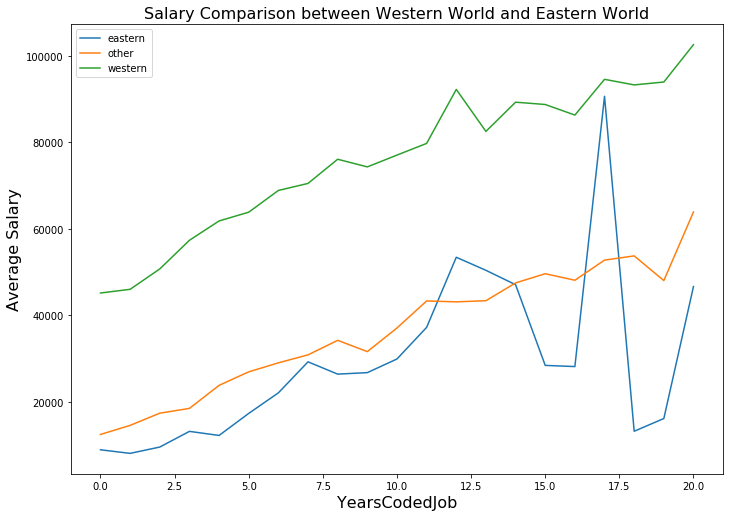

In [42]:
#Plot the Salary Comparison between Western World and Eastern World
plt.figure(figsize=[ 11.69, 8.27])
comparison_graph.groupby('region')['Salary'].plot(legend=True)
plt.title("Salary Comparison between Western World and Eastern World",fontsize = 16);
plt.xlabel('YearsCodedJob',fontsize = 16)
plt.ylabel('Average Salary',fontsize = 16)

In [28]:
df.groupby(['region'])['Salary'].mean()

region
eastern    14843.344851
other      27504.576365
western    68419.802474
Name: Salary, dtype: float64

### In this section we can clearly see the following results
* Western world have better oppurtunities in any type of formal education
* Bachelor's degree is best for pursuing a job
* Masters degree also 2nd best for pursuing job
* Without any further education there are not much oppurtunities

In [29]:
# Replace a value to shorter form in formalEducation column
df.replace(to_replace="Some college/university study without earning a bachelor's degree", value = "Not a bachelor's degree",inplace = True)

Text(0.5, 1.0, 'Status of Formal Education')

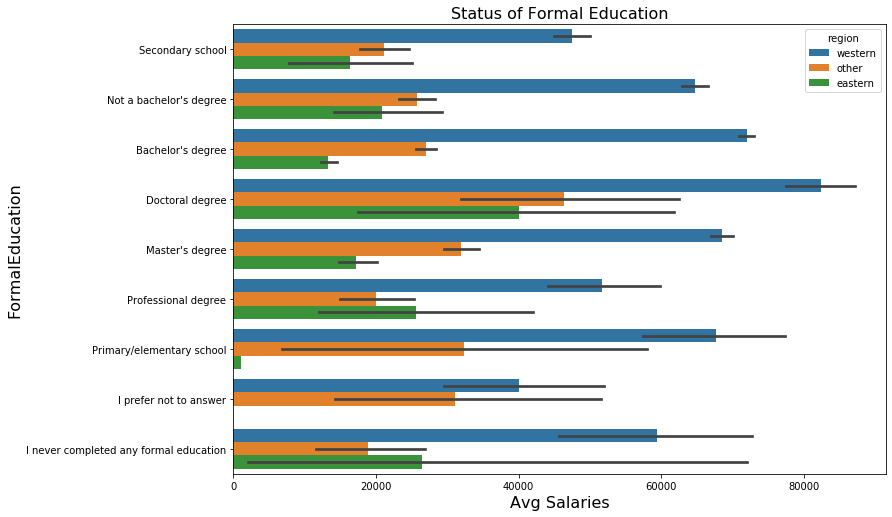

In [52]:
plt.figure(figsize=[ 11.69, 8.27])
sb.barplot(data=df, y='FormalEducation', x='Salary', hue ='region')
plt.xlabel('Avg Salaries', fontsize = 16);
plt.ylabel('FormalEducation', fontsize = 16);
plt.title("Status of Formal Education", fontsize = 16)

### In this section we can see that
The lines represent how they think they are overpaid, with a higher mark indicates the more they think they are overpaid.

You can see that eastern programmers (blue line) feel more underpaid in their whole careers than western programmers (green line)

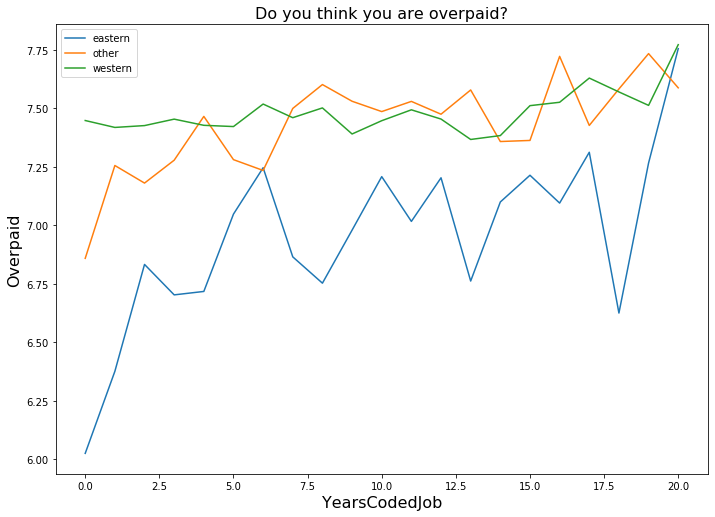

In [45]:
#Plot how the programmer thinks they are overpaid or not
plt.figure(figsize=[ 11.69, 8.27])
comparison_graph.groupby('region')['CareerSatisfaction'].plot(legend=True);
plt.title("Do you think you are overpaid?", fontsize = 16);
plt.xlabel('YearsCodedJob', fontsize = 16);
plt.ylabel('Overpaid', fontsize = 16);

In [33]:
#carrersatisfaction mean rating 
comparison.groupby('region').mean().CareerSatisfaction

region
eastern    6.957425
other      7.430330
western    7.482944
Name: CareerSatisfaction, dtype: float64

In [36]:
# Jobsatisfaction mean rating 
comparison.groupby('region').mean().JobSatisfaction

region
eastern    6.645244
other      7.051039
western    7.129183
Name: JobSatisfaction, dtype: float64

### In this section we can conclude that:

Here, we can see that western programmers (blue ball) have a much higher satisfaction on their job and career, positioned at the right-high-up corner. The ball size indicator their average salary, the blue ball size is much larger than the red ball (eastern programmers salary).

Text(0, 0.5, 'Job Satisfaction')

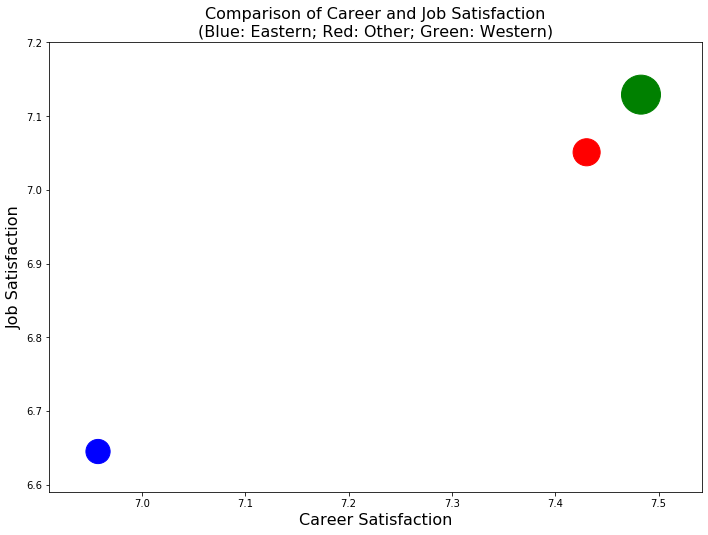

In [44]:
#Plot Comparison of Career and Job Satisfaction between Western and Eastern
plt.figure(figsize=[ 11.69, 8.27])
plt.scatter(comparison.groupby('region').mean().CareerSatisfaction, comparison.groupby('region').mean().JobSatisfaction, comparison.groupby('region').mean().Salary/50, c=['blue','red','green'])

plt.title('Comparison of Career and Job Satisfaction\n(Blue: Eastern; Red: Other; Green: Western)', fontsize = 16);
plt.xlabel('Career Satisfaction',fontsize = 16)
plt.ylabel('Job Satisfaction', fontsize = 16)

### Conclusion:
* We can easily conclude that advantage in salaries falls in western side, Eastern side have lower mean salary then others. So in bases of salaries we go for western countries.
* From formal education we can conclude that having a bachelor's degree really helps to get a job every part either eastern or western. Master's degree is good but most of employees pursue job after bachelor's degree.
* We then looked at how different between the viewpoints that both west and east think if they are underpaid. This showed that more eastern programmers always think that they are underpaid than the western programmers no matter how many years they are coded.
* Eastern or other programmers don't have much job satisfaction and career satisfaction. On the other side as we can see eastern countries have lowest job satisfaction and career satisfaction.